In [2]:
#import sklearn as sk;
import pandas as pd;
import numpy as np; 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, LabelEncoder, LabelBinarizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV, cross_validate
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter


Label: Human_Development_Index

Countrys: 
"Name" 
"Region" 

Education: 

Event:

Heath:

Month:

Population:

Quality of Life:

In [3]:
# load the datasets 
dfCountry = pd.read_csv('./Tables/Country.csv')
dfEducation = pd.read_csv('./Tables/Education.csv')
dfEvent = pd.read_csv('./Tables/Event.csv')
dfFactTable = pd.read_csv('./Tables/Fact_Table.csv')
dfHealth = pd.read_csv('./Tables/Health.csv')
dfMonth = pd.read_csv('./Tables/Month.csv')
dfPopulation = pd.read_csv('./Tables/Population.csv')
dfQualityOfLife = pd.read_csv('./Tables/Quality_of_Life.csv')

dfPopulation = dfPopulation.drop(["PopulationKey", "SurrogateKey", "Country", "Year"], axis=1)
dfEducation = dfEducation.drop(["EducationKey", "SurrogateKey", "Country", "Year"], axis=1)
dfHealth = dfHealth.drop(["HealthKey", "SurrogateKey", "Country", "Year"], axis=1)
dfQualityOfLife = dfQualityOfLife.drop(["QualityofLifeKey", "SurrogateKey"], axis=1)

print(dfEducation.shape[0])
print(dfHealth.shape[0])
print(dfPopulation.shape[0])
print(dfQualityOfLife.shape[0])

canada = dfFactTable.loc[dfFactTable['CountryKey'] == 2]
unitedStates = dfFactTable.loc[dfFactTable['CountryKey'] == 8]
mexico = dfFactTable.loc[dfFactTable['CountryKey'] == 5]
mauritius = dfFactTable.loc[dfFactTable['CountryKey'] == 6]
liberia = dfFactTable.loc[dfFactTable['CountryKey'] == 4]
congo = dfFactTable.loc[dfFactTable['CountryKey'] == 3]
vietnam = dfFactTable.loc[dfFactTable['CountryKey'] == 9]
nepal = dfFactTable.loc[dfFactTable['CountryKey'] == 7]
bangladesh = dfFactTable.loc[dfFactTable['CountryKey'] == 1]

fixedFact = pd.concat([canada, unitedStates, mexico, mauritius, liberia, congo, vietnam, nepal, bangladesh],ignore_index=True)
fixedFact = fixedFact.drop(["MonthKey","CountryKey", "EducationKey",  "QualityofLifeKey", "HealthKey", "EventKey", "PopulationKey", "Development_Index"], axis=1) 

df = pd.concat([dfQualityOfLife, dfHealth, dfPopulation, dfEducation, fixedFact], axis=1)

# print the shape of the dataframes 
print(f"Test Data shape: \n{dfCountry}\n")
print(f"Test Data shape: \n{dfEducation.shape}\n")
print(f"Test Data shape: \n{dfEvent.shape}\n")
print(f"Test Data shape: \n{dfFactTable.shape}\n")
print(f"Test Data shape: \n{dfHealth.shape}\n")
print(f"Test Data shape: \n{dfMonth.shape}\n")
print(f"Test Data shape: \n{dfPopulation.shape}\n")
print(f"Test Data shape: \n{dfQualityOfLife.shape}\n")
print("_____________________________________________\n")


    #scatterPlot


#print(f"Health Scatterplot: \n{scatterHealth}\n")




144
144
144
144
Test Data shape: 
   CountryKey  SurrogateKey             Name                     Region  \
0           1            20       Bangladesh                 South Asia   
1           2            35           Canada              North America   
2           3            43  Dem. Rep. Congo         Sub-Saharan Africa   
3           4           130          Liberia         Sub-Saharan Africa   
4           5           153           Mexico  Latin America & Caribbean   
5           6           166        Mauritius         Sub-Saharan Africa   
6           7           177            Nepal                 South Asia   
7           8           250    United States              North America   
8           9           256          Vietnam        East Asia & Pacific   

       Continent          Currency        Capital WB-2_Code Country_Code  \
0           Asia  Bangladeshi taka          Dhaka        BD          BGD   
1  North America   Canadian dollar         Ottawa        CA    

for item in (df.columns.values):
     scatterPlot = df.plot.scatter(x=item, y='Human_Development_Index', c='orange')
     scatterPlot.xaxis.label.set_color('white')        #setting up X-axis label color to yellow
     scatterPlot.yaxis.label.set_color('white')          #setting up Y-axis label color to blue
     scatterPlot.tick_params(axis='x', colors='white')    #setting up X-axis tick color to red
     scatterPlot.tick_params(axis='y', colors='white')  #setting up Y-axis tick color to black
     scatterPlot.spines['left'].set_color('white')        # setting up Y-axis tick color to red
     scatterPlot.spines['top'].set_color('white')         #setting up above X-axis tick color to red

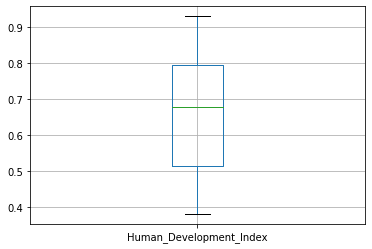

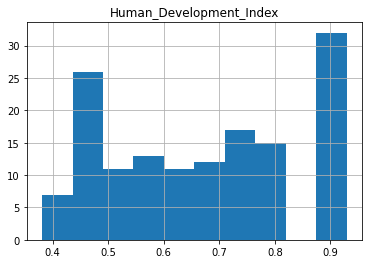

In [4]:
boxplot = df.boxplot(column = 'Human_Development_Index')
histogram = df.hist(column='Human_Development_Index')

In [5]:
#Finds the percentage of nulls within each column
percent_missing = df.isnull().sum() * 100 / len(df)

#Takes any columns that have a % of nulls greater than 1/3, and drops them from the dataframe
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
print("\n\n Below are the percentages of nulls in each of our possible features:")
print("_____________________________________________________________________\n ")
print(missing_value_df)
df = df.drop(missing_value_df[percent_missing>33.33].index, axis=1)

df["Population,_total"] = df["Population,_total"].astype('float64')
df["Population,_male"] = df["Population,_male"].astype('float64')
df["Population,_female"] = df["Population,_female"].astype('float64')
df["Quality_of_Life"] = df["Quality_of_Life"].astype('float64')




 Below are the percentages of nulls in each of our possible features:
_____________________________________________________________________
 
                                                    percent_missing
Country                                                    0.000000
Age_dependency_ratio,_young                                0.000000
Age_dependency_ratio_(%_of_working-age_population)         0.000000
Urban_population_(%_of_total_population)                   0.000000
Rural_population_(%_of_total_population)                   0.000000
Population_growth_(annual_%)                               0.000000
Population,_female                                         0.000000
Population,_male                                           0.000000
Population,_total                                          0.000000
Quality_of_Life                                            0.000000
Unemployment,_total(%_of_total_labor_force)                0.000000
Human_Development_Index                 

C:\Users\adamj\AppData\Local\Temp\ipykernel_17532\1009057893.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.drop(missing_value_df[percent_missing>33.33].index, axis=1)


In [6]:
#create our classification label
#we chose good human development index which is a boolean value that is true if Human_Development_Index is equal to or above 0.7
df['Good_HDI'] = (df['Human_Development_Index'] >= 0.7)
df['Good_HDI'] = df['Good_HDI'].astype(int)
df['Good_HDI'].value_counts
#print (df['Good_HDI'])
#drop Human_Development_Index since we replaced it
df = df.drop(["Human_Development_Index"], axis=1)
df = df.drop(["Country"], axis=1) #We drop country as a label, because if one is using this model to predict the HDI of a country, they would presumably know for which country they are predicting
print (df)


           Year  People_practicing_open_defecation(%_of_population)  \
0    2005-01-01                                           0.000000    
1    2006-01-01                                           0.000000    
2    2007-01-01                                           0.000000    
3    2008-01-01                                           0.000000    
4    2009-01-01                                           0.000000    
..          ...                                                ...    
139  2016-01-01                                           1.851918    
140  2017-01-01                                           1.020961    
141  2018-01-01                                           0.220963    
142  2019-01-01                                           0.000000    
143  2020-01-01                                           0.000000    

     %_of_population_using_least_basic_sanitation_services  \
0                                            99.805190       
1                      

In [7]:
print(f"dataframe datatypes:\n")
print(df.dtypes)
print("\n")
print("_____________________________________________\n")


dataframe datatypes:

Year                                                               object
People_practicing_open_defecation(%_of_population)                float64
%_of_population_using_least_basic_sanitation_services             float64
%_of_population_using_at_least_basic_drinking_water_services      float64
Labor_force,_female(%_of_total_labor_force)                       float64
Unemployment,_male(%_of_male_labor_force)                         float64
Unemployment,_female(%_of_female_labor_force)                     float64
Unemployment,_total(%_of_total_labor_force)                       float64
Domestic_government_health_expenditure_per_capita(current US$)    float64
Immunization_HepB3(%_of_one-year-old_children)                    float64
Adults(ages_15+)_and_children(0-14_years)_living_with_HIV         float64
Out-of-pocket_expenditure(%_of _current_health_expenditure)       float64
Mortality_from_CVD,cancer,diabetes_or_CRD_between_30-70(%)        float64
Population,_tota

In [8]:
#Split
data_train, data_test = train_test_split(df, test_size=0.2, random_state=42)
print(f"Train Data shape: \n{data_train}\n")
print(f"Test Data shape: \n{data_test}\n")


Train Data shape: 
           Year  People_practicing_open_defecation(%_of_population)  \
124  2017-01-01                                          18.260935    
31   2020-01-01                                           0.000000    
98   2007-01-01                                          10.968711    
36   2009-01-01                                           4.966066    
16   2005-01-01                                           0.000000    
..          ...                                                ...    
71   2012-01-01                                          44.183975    
106  2015-01-01                                           3.845596    
14   2019-01-01                                           0.000000    
92   2017-01-01                                          11.854021    
102  2011-01-01                                           7.318510    

     %_of_population_using_least_basic_sanitation_services  \
124                                          65.595375       
31  

In [9]:
# separate the features and the labels to be used in model development
columns = data_train.columns.to_list()
columns_drop = columns.pop(-1)
labels_train = data_train.drop(columns, axis=1)
labels_test = data_test.drop(columns, axis=1)
print(f"labels_train: \n{labels_train}\n")
print(f"labels_test: \n{labels_test}\n")
features_train = data_train.drop(['Good_HDI'], axis=1)
features_test = data_test.drop(['Good_HDI'], axis=1)
print(f"features_train: \n{features_train }\n")
print(f"features_test: \n{features_test }\n")

labels_train: 
     Good_HDI
124         0
31          1
98          0
36          1
16          1
..        ...
71          0
106         0
14          1
92          0
102         0

[115 rows x 1 columns]

labels_test: 
     Good_HDI
117         0
19          1
82          0
97          0
56          1
12          1
132         0
65          0
66          0
18          1
51          1
78          0
94          0
133         0
100         0
64          0
27          1
69          0
125         0
73          0
11          1
119         0
110         1
113         0
55          1
45          1
9           1
4           1
26          1

features_train: 
           Year  People_practicing_open_defecation(%_of_population)  \
124  2017-01-01                                          18.260935    
31   2020-01-01                                           0.000000    
98   2007-01-01                                          10.968711    
36   2009-01-01                                         

In [10]:
#Min max normalization of the numerical data (to bring all values in between 0 and 1)
numerical_df_train = features_train.drop(["Year"], axis=1)
numerical_df_test = features_test.drop(["Year"], axis=1)
#normalized_df_train = (numerical_df_train-numerical_df_train.min())/(numerical_df_train.max()-numerical_df_train.min())
#normalized_df_test = (numerical_df_test-numerical_df_test.min())/(numerical_df_test.max()-numerical_df_test.min())
#normalized_df_train
#normalized_df_test


years = ['2010-01-01', '2008-01-01', '2007-01-01', '2006-01-01', '2013-01-01',
 '2017-01-01', '2009-01-01', '2006-01-01', '2007-01-01', '2007-01-01',
 '2008-01-01', '2019-01-01', '2019-01-01', '2010-01-01', '2009-01-01',
 '2005-01-01', '2016-01-01', '2010-01-01', '2018-01-01', '2014-01-01',
 '2016-01-01', '2012-01-01', '2019-01-01', '2006-01-01', '2012-01-01',
 '2018-01-01', '2014-01-01', '2009-01-01', '2015-01-01']
 encoded_cols = np.append(countries, years)
encoded_cols = np.append(encoded_cols, features_test.columns[2:])

In [11]:
#features_train["Country"].astype('category')
features_train["Year"].astype('category')
features_train.drop


<bound method DataFrame.drop of            Year  People_practicing_open_defecation(%_of_population)  \
124  2017-01-01                                          18.260935    
31   2020-01-01                                           0.000000    
98   2007-01-01                                          10.968711    
36   2009-01-01                                           4.966066    
16   2005-01-01                                           0.000000    
..          ...                                                ...    
71   2012-01-01                                          44.183975    
106  2015-01-01                                           3.845596    
14   2019-01-01                                           0.000000    
92   2017-01-01                                          11.854021    
102  2011-01-01                                           7.318510    

     %_of_population_using_least_basic_sanitation_services  \
124                                          65.59537

In [12]:
# select one of the scaling strategies and briefly explain why it is essential to scale your features in the markdown cell mentioned below (3)

# create the necessary pipelines and combine the features to be used as the training data for the given algorithm (8)

num_pipeline = Pipeline([
        ('imputer', KNNImputer(n_neighbors=5)),
        ('std_scaler', StandardScaler()),
    ])

num_attribs = list(numerical_df_train)
cat_attribs = ["Year"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ('year', OrdinalEncoder(), ['Year'])
    ])
features_train = features_train.reset_index(drop=True)

data_prepared = pd.DataFrame(full_pipeline.fit_transform(features_train),columns=features_train.columns, index=features_train.index)
#full_pipeline.fit_transform(data_train)
#pd.DataFrame(full_pipeline.fit_transform(train_df),columns=train_df.columns, index=train_df.index)
print(data_prepared)


         Year  People_practicing_open_defecation(%_of_population)  \
0    0.576955                                          -0.008290    
1   -0.706815                                           1.068273    
2    0.064301                                          -0.009492    
3   -0.357694                                           0.586741    
4   -0.706815                                           1.074659    
..        ...                                                ...    
110  2.399383                                          -1.558742    
111 -0.436464                                           0.470627    
112 -0.706815                                           1.047840    
113  0.126540                                          -1.556702    
114 -0.192313                                           0.233715    

     %_of_population_using_least_basic_sanitation_services  \
0                                             0.092637       
1                                             0

In [13]:
# create the oversampling object
oversample = SMOTE()
# oversample the minority class
# input_x will be the transformed training data using the combined pipelines, and the labels represent the training labels
input_x_over, y_over = oversample.fit_resample(data_prepared, labels_train)

# print the dimensionality of the original training dataset (0.5)
print(f"Train Data shape: \n{data_train.shape}\n")
print(f"Train Data size: \n{data_train.size}\n")
print(f"Train Data ndim: \n{data_train.ndim}\n")
print("_____________________________________________\n")

# print the dimensionality of the oversampled training dataset (0.5)
print(f"Oversampled Train Data shape: \n{input_x_over.shape}\n")
print(f"Oversampled Train Data size: \n{input_x_over.size}\n")
print(f"Oversampled Train Data ndim: \n{input_x_over.ndim}\n")
print("_____________________________________________\n")


# print the new class distribution using the Counter (1)
print(f"New Class Distribution: {Counter(y_over['Good_HDI'])}")
#print(f"Percent With HepC: \n{test_df['category'].value_counts()[1]/ test_df.shape[0] }\n")
print("_____________________________________________\n")


Train Data shape: 
(115, 27)

Train Data size: 
3105

Train Data ndim: 
2

_____________________________________________

Oversampled Train Data shape: 
(122, 26)

Oversampled Train Data size: 
3172

Oversampled Train Data ndim: 
2

_____________________________________________

New Class Distribution: Counter({0: 61, 1: 61})
_____________________________________________



In [14]:
# create the following four different models with their default hyperparameter values to be trained using the preprocessed data (0.5 * 4)
labelTrainFlat = labels_train.values.ravel()
y_over_flat = y_over.values.ravel()
# Gradient Boosting
gradientBoosting = GradientBoostingClassifier()
gradientBoosting = gradientBoosting.fit(data_prepared, labelTrainFlat)

# Decision Trees
decisionTree = DecisionTreeClassifier()
decisionTree = decisionTree.fit(data_prepared,labelTrainFlat)

# Random Forests
randomForest = RandomForestClassifier()
randomForest = randomForest.fit(data_prepared,labelTrainFlat)


In [15]:
parametersGradientBoosting = [
    {'n_estimators': [10,100,50],'min_samples_split': [2,3], 'min_samples_leaf': [2,4,5]}
]

parametersDecisionTree = [
    {'max_depth': [1,2,3,4],'min_samples_split': [2,3], 'min_samples_leaf': [4,5]}
]

parametersRandomForest = [
    {'n_estimators': [145,150,155],'max_depth': [5,6,7], 'bootstrap': [True, False]}
]

# initialize gridsearch with the required parameters, including the following scoring methods and refit='bal_accuracy' (2)
scoringX = {"accuracy": "accuracy", "bal_accuracy": "balanced_accuracy", "F1_macro": "f1_macro"}

grid_searchGradientBoosting = GridSearchCV(gradientBoosting, parametersGradientBoosting, cv=5, scoring = scoringX, return_train_score=True, n_jobs=-1, refit='bal_accuracy')

grid_searchDecisionTree = GridSearchCV(decisionTree, parametersDecisionTree, cv=5, scoring = scoringX, return_train_score=True, n_jobs=-1, refit='bal_accuracy')

grid_searchRandomForest = GridSearchCV(randomForest, parametersRandomForest, cv=5, scoring = scoringX, return_train_score=True, n_jobs=-1, refit='bal_accuracy')



# fit the training data (0.5)
grid_searchGradientBoosting.fit(data_prepared, labelTrainFlat)
grid_searchDecisionTree.fit(data_prepared, labelTrainFlat)
grid_searchRandomForest.fit(data_prepared, labelTrainFlat)

# print the best parameters (0.5)
print(f"Best parameters GradientBoosting: \n{grid_searchGradientBoosting.best_params_}\n")
print(f"Best parameters DecisionTree: \n{grid_searchDecisionTree.best_params_}\n")
print(f"Best parameters RandomForest: \n{grid_searchRandomForest.best_params_}\n")

print(f"Best estimator GradientBoosting: \n{grid_searchGradientBoosting.best_estimator_}\n")
print(f"Best estimator DecisionTree: \n{grid_searchDecisionTree.best_estimator_}\n")
print(f"Best estimator RandomForest: \n{grid_searchRandomForest.best_estimator_}\n")

print(f"Best score GradientBoosting: \n{grid_searchGradientBoosting.best_score_}\n")
print(f"Best score DecisionTree: \n{grid_searchDecisionTree.best_score_}\n")
print(f"Best score RandomForest: \n{grid_searchRandomForest.best_score_}\n")

Best parameters GradientBoosting: 
{'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}

Best parameters DecisionTree: 
{'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 2}

Best parameters RandomForest: 
{'bootstrap': True, 'max_depth': 5, 'n_estimators': 145}

Best estimator GradientBoosting: 
GradientBoostingClassifier(min_samples_leaf=2, n_estimators=10)

Best estimator DecisionTree: 
DecisionTreeClassifier(max_depth=1, min_samples_leaf=4)

Best estimator RandomForest: 
RandomForestClassifier(max_depth=5, n_estimators=145)

Best score GradientBoosting: 
1.0

Best score DecisionTree: 
1.0

Best score RandomForest: 
1.0



In [16]:
# print the grid search cross-validation results listing the above mentioned evaluation methods (3)
cross_val_resultsGB = grid_searchGradientBoosting.cv_results_
cross_val_resultsDT = grid_searchDecisionTree.cv_results_
cross_val_resultsRF = grid_searchRandomForest.cv_results_



print(f"Mean Test Accuracy for GradientBoosting: \n{cross_val_resultsGB['mean_test_accuracy']}\n")
print(f"Balanced Test Accuracy for GradientBoosting: \n{cross_val_resultsGB['mean_test_bal_accuracy']}\n")
print(f"Mean F1 Macro for GradientBoosting: \n{cross_val_resultsGB['mean_test_F1_macro']}\n")

#DTC
print(f"Mean Test Accuracy for Decision Trees: \n{cross_val_resultsDT['mean_test_accuracy']}\n")
print(f"Balanced Test Accuracy for Decision Trees: \n{cross_val_resultsDT['mean_test_bal_accuracy']}\n")
print(f"Mean F1 Macro for Decision Trees: \n{cross_val_resultsDT['mean_test_F1_macro']}\n")

#RFC
print(f"Mean Test Accuracy for Random Forests: \n{cross_val_resultsRF['mean_test_accuracy']}\n")
print(f"Balanced Test Accuracy for Random Forests: \n{cross_val_resultsRF['mean_test_bal_accuracy']}\n")
print(f"Mean F1 Macro for Random Forests: \n{cross_val_resultsRF['mean_test_F1_macro']}\n")

#NB


Mean Test Accuracy for GradientBoosting: 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Balanced Test Accuracy for GradientBoosting: 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Mean F1 Macro for GradientBoosting: 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Mean Test Accuracy for Decision Trees: 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Balanced Test Accuracy for Decision Trees: 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Mean F1 Macro for Decision Trees: 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Mean Test Accuracy for Random Forests: 
[1.         0.99130435 1.         1.         0.99130435 1.
 1.         0.99130435 1.         1.         1.         1.
 1.         1.         1.         1.         0.99130435 1.        ]

Balanced Test Accuracy for Random Forests: 
[1.   0.99 1.   1.   0.99 1.   1.   0.99 1.   1.   1.   1.   1.   1.
 1.   1.   0.99 1.  ]

Mean F1 Macro for Random Forests: 
[1.         0.99103314 1.         

In [17]:
# use a dummy classifier to identify a simple baseline (i.e., a majority class baseline) so that you can compare your prediction results (3)
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(data_prepared, labelTrainFlat)
DummyClassifier(strategy='most_frequent')
print(f"Dummy Prediction: \n{dummy_clf.predict(data_prepared)}\n") 
print(f"Dummy Score: \n{dummy_clf.score(data_prepared, labelTrainFlat)}\n")  

Dummy Prediction: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]

Dummy Score: 
0.5304347826086957



In [18]:
#prepare test data
num_pipeline_test = Pipeline([
        ('imputer', KNNImputer(n_neighbors=5)),
        ('std_scaler', StandardScaler()),
    ])

num_attribs_test = list(numerical_df_test)
cat_attribs_test = ["Country", "Year"]

full_pipeline_test = ColumnTransformer([
        ("num", num_pipeline, num_attribs_test),
        ("cat", OneHotEncoder(), cat_attribs_test),
    ])
features_test = features_test.reset_index(drop=True)

data_prepared_test = pd.DataFrame(full_pipeline.fit_transform(features_test),columns=features_test.columns, index=features_test.index)
#print(data_prepared_test)

# obtain predictions on test data using the best model from GridSearchCV (i.e., .best_estimator_) (2)
predictions_test = grid_searchRandomForest.best_estimator_.predict(data_prepared_test)

print(classification_report(labels_test.values.ravel(),predictions_test))
print(confusion_matrix(labels_test, predictions_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        13

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

[[16  0]
 [ 0 13]]
